In [94]:
import tensorflow as tf
import os

In [95]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [96]:
tf.config.list_physical_devices('GPU')

[]

In [97]:
import cv2
import imghdr

In [98]:
data_dir = 'data' 

In [99]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [100]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [101]:
import numpy as np
from matplotlib import pyplot as plt

In [102]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [103]:
data_iterator = data.as_numpy_iterator()

In [104]:
batch = data_iterator.next()

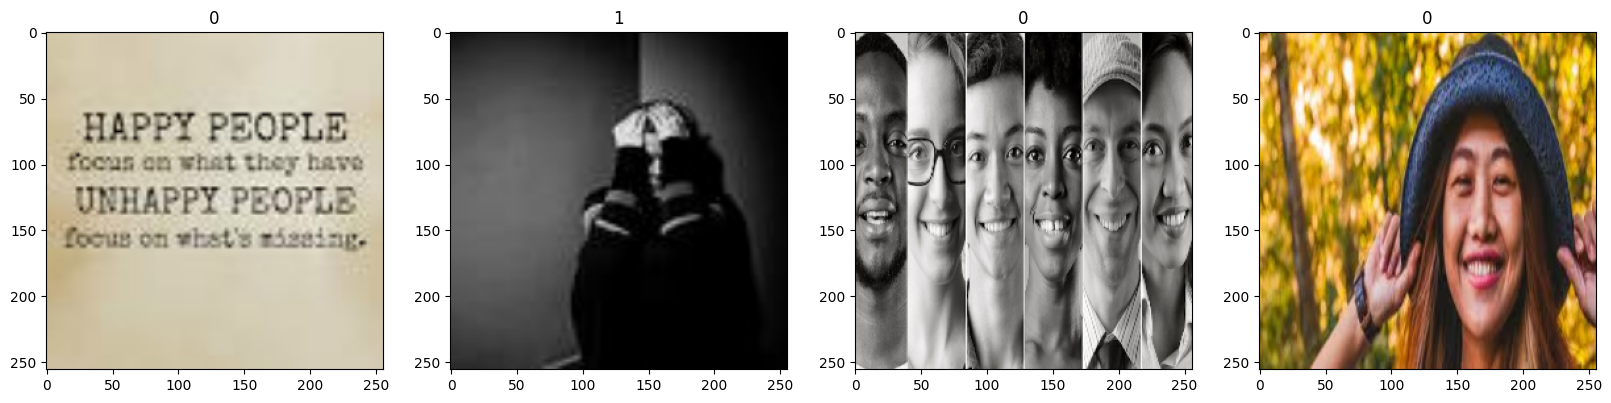

In [105]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [106]:
data = data.map(lambda x,y: (x/255, y))

In [107]:
data.as_numpy_iterator().next()

(array([[[[0.15719976, 0.16787471, 0.16747855],
          [0.15719976, 0.16470589, 0.18431373],
          [0.16470589, 0.16470589, 0.16470589],
          ...,
          [0.9529412 , 0.90588236, 0.8509804 ],
          [0.9452066 , 0.89814776, 0.8432458 ],
          [0.9529412 , 0.90588236, 0.8509804 ]],
 
         [[0.16078432, 0.16724111, 0.16747855],
          [0.16078432, 0.16470589, 0.1800935 ],
          [0.16470589, 0.16470589, 0.16470589],
          ...,
          [0.9559513 , 0.90889245, 0.8539905 ],
          [0.94509804, 0.8980392 , 0.84313726],
          [0.9524267 , 0.90536785, 0.8504659 ]],
 
         [[0.16358763, 0.16582415, 0.16108128],
          [0.16358763, 0.16477358, 0.16680698],
          [0.16470589, 0.16470589, 0.16470589],
          ...,
          [0.9559513 , 0.90889245, 0.8539905 ],
          [0.94790137, 0.90084255, 0.8459406 ],
          [0.95475346, 0.90769464, 0.8527927 ]],
 
         ...,
 
         [[0.16470589, 0.16470589, 0.16470589],
          [0.16470

In [108]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [109]:
train_size

7

In [110]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [111]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [113]:
model = Sequential()

In [114]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [115]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [117]:
logdir='logs'

In [118]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [119]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 472ms/step - accuracy: 0.5743 - loss: 0.8978 - val_accuracy: 0.5625 - val_loss: 0.5751
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.5961 - loss: 0.6347 - val_accuracy: 0.7500 - val_loss: 0.6367
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 439ms/step - accuracy: 0.7474 - loss: 0.6197 - val_accuracy: 0.7500 - val_loss: 0.5656
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 450ms/step - accuracy: 0.7783 - loss: 0.4993 - val_accuracy: 0.8438 - val_loss: 0.4266
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.8176 - loss: 0.4573 - val_accuracy: 0.8281 - val_loss: 0.4217
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 461ms/step - accuracy: 0.8712 - loss: 0.3961 - val_accuracy: 0.9062 - val_loss: 0.3091
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 460ms/step - accuracy: 0.8915 - loss: 0.3132 - val_accuracy: 0.9219 - val_loss: 0.2151
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 450ms/step - accuracy: 0.9259 - loss: 0.2410 - val_accuracy: 0.9688 - val_loss:

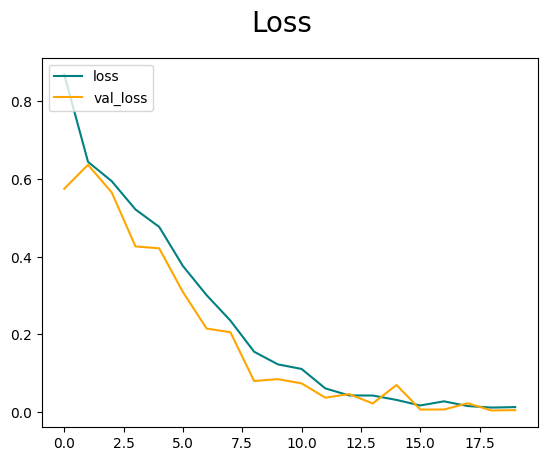

In [120]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

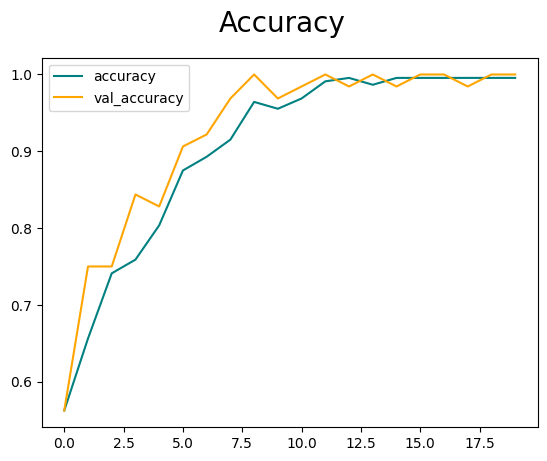

In [121]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [122]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [123]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [124]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [125]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [126]:
import cv2

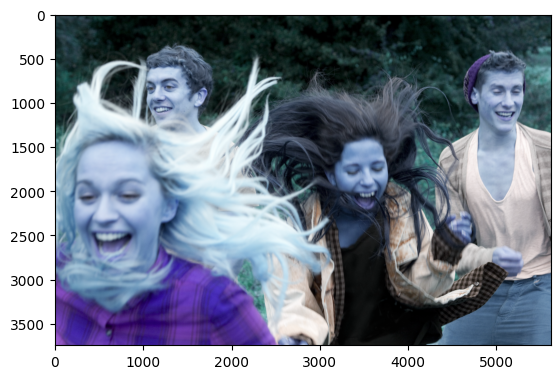

In [128]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

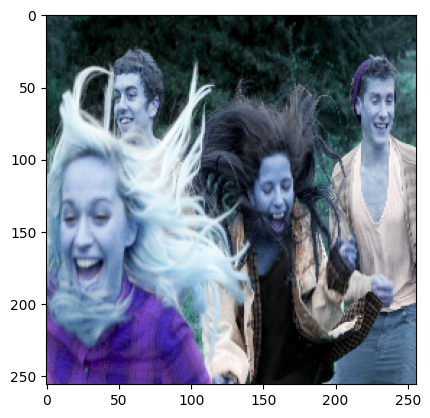

In [129]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [130]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [131]:
yhat

array([[0.946221]], dtype=float32)

In [132]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [133]:
from tensorflow.keras.models import load_model

In [134]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)